# **CALCULATION OF MOOD BASED ON SENTIMENTAL ANALYSIS**

## **1. LOAD THE DATA SET**

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/test.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Shape of dataset:", data.shape)
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print(data.head())

Shape of dataset: (2000, 2)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


**Description:**
I used pandas to load the dataset from the specified file path into a DataFrame. Then, I checked the shape of the dataset to see the number of rows and columns. I printed the dataset's information, such as column names, non-null counts, and data types, to ensure data integrity. Lastly, I displayed the first few rows of the dataset to get an overview of the text and label columns.

As an output, I got:

**Shape**: Number of rows and columns in the dataset.
Info: Metadata about the dataset, including data types and null values.

**Head**: A snapshot of the first few rows to verify the data.


## **2. Preprocess the Text Data**

In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources (stopwords and wordnet)
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r"[^\w\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    tokens = text.split()
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to the text column
data["processed_text"] = data["text"].apply(preprocess_text)

# Display the first few rows of the processed dataset
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text  label  \
0  im feeling rather rotten so im not very ambiti...      0   
1          im updating my blog because i feel shitty      0   
2  i never make her separate from me because i do...      0   
3  i left with my bouquet of red and yellow tulip...      1   
4    i was feeling a little vain when i did this one      0   

                                      processed_text  
0        im feeling rather rotten im ambitious right  
1                       im updating blog feel shitty  
2    never make separate ever want feel like ashamed  
3  left bouquet red yellow tulip arm feeling slig...  
4                            feeling little vain one  


**Description:**
I used NLTK and regular expressions to preprocess the text data. First, I downloaded the stopwords and wordnet resources for text cleaning and lemmatization. Then, I removed punctuation and special characters using regex, converted the text to lowercase for uniformity, and tokenized the words. Next, I filtered out stopwords (common words like "the" or "and") and applied lemmatization to reduce words to their base forms (e.g., "running" → "run").

As an output, I created a new column processed_text with the cleaned text data. Each row now contains the processed version of the original text, which is ready for feature extraction.

## **3. Encode the Labels**

In [3]:
# Assign existing numeric labels to a new column for clarity
data["encoded_label"] = data["label"]

# Display the first few rows to confirm
print(data.head())

                                                text  label  \
0  im feeling rather rotten so im not very ambiti...      0   
1          im updating my blog because i feel shitty      0   
2  i never make her separate from me because i do...      0   
3  i left with my bouquet of red and yellow tulip...      1   
4    i was feeling a little vain when i did this one      0   

                                      processed_text  encoded_label  
0        im feeling rather rotten im ambitious right              0  
1                       im updating blog feel shitty              0  
2    never make separate ever want feel like ashamed              0  
3  left bouquet red yellow tulip arm feeling slig...              1  
4                            feeling little vain one              0  


**Description:**
I assigned the existing label column to a new column named encoded_label to ensure clarity while working on encoding later steps. This step helps keep the original dataset intact while providing a consistent naming convention for labels during training.

As an output, I got a new column encoded_label in the DataFrame, which contains the same numeric values as the label column. This ensures the dataset is now ready for splitting into training and testing sets.

## **4. Split the Dataset into Training and Testing Sets**

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data["processed_text"], data["encoded_label"], test_size=0.2, random_state=42
)

# Print the sizes of training and testing sets
print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 1600
Testing Set Size: 400


**Description:**
I split the dataset into training and testing sets using train_test_split from scikit-learn. The processed text data (processed_text) serves as the input features, and the encoded labels (encoded_label) are the target values. I allocated 80% of the data for training and 20% for testing to ensure a good balance for evaluation.

**As an output:**

I got two datasets: X_train and X_test for the text inputs and y_train and y_test for the labels.
The training set contains 80% of the data, and the testing set contains the remaining 20%.

## **5. Extract Features Using TF-IDF**

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

# Print the shape of the transformed datasets
print("TF-IDF Training Features Shape:", X_train_tfidf.shape)
print("TF-IDF Testing Features Shape:", X_test_tfidf.shape)

TF-IDF Training Features Shape: (1600, 3855)
TF-IDF Testing Features Shape: (400, 3855)


**Description:**
I used TfidfVectorizer from scikit-learn to convert the processed text into numerical feature vectors. The max_features=5000 parameter ensures only the top 5000 most relevant terms are considered, improving performance and reducing computational cost.

I fit the TF-IDF vectorizer on the training data (X_train) to learn term weights and transformed it into a numerical matrix (X_train_tfidf).
I transformed the test data (X_test) using the same vectorizer to maintain consistency in features.

**As an output:**

I got two matrices: X_train_tfidf and X_test_tfidf, representing the numerical features for the training and testing datasets.
Each row corresponds to a sample, and each column represents a term's TF-IDF value.

## **6. Train a Logistic Regression Model**

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Print a confirmation message
print("Model training complete!")

Model training complete!


**Description:**
I used LogisticRegression from scikit-learn to train the model on the TF-IDF-transformed training data (X_train_tfidf) with corresponding labels (y_train). Logistic Regression is a simple yet effective algorithm for text classification tasks.

I initialized the model with max_iter=1000 to allow sufficient iterations for convergence.
Then, I trained the model using the .fit() method, which learns the relationship between the input features and the target labels.

**As an output:**

The Logistic Regression model is now trained and ready for predictions on the test data.

## **7. Evaluate the Model**

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.64
Precision: 0.72
Recall: 0.64
F1-Score: 0.57


**Description:**
I used scikit-learn's accuracy_score, precision_score, recall_score, and f1_score to evaluate the model's predictions (y_pred) against the true labels (y_test). Each metric gives insight into the model’s performance:

1.   Accuracy: The fraction of correctly predicted labels.
2.   Precision: The ratio of true positives to all predicted positives.
3.   Recall: The ratio of true positives to all actual positives.
4.   F1-Score: A balance between precision and recall.


**As an output:**

I got the performance metrics (Accuracy, Precision, Recall, F1-Score) as numeric values, giving a quantitative measure of how well the model performs on the test data.

## **8. Plot Precision, Recall, F1-Score, and Display Accuracy**

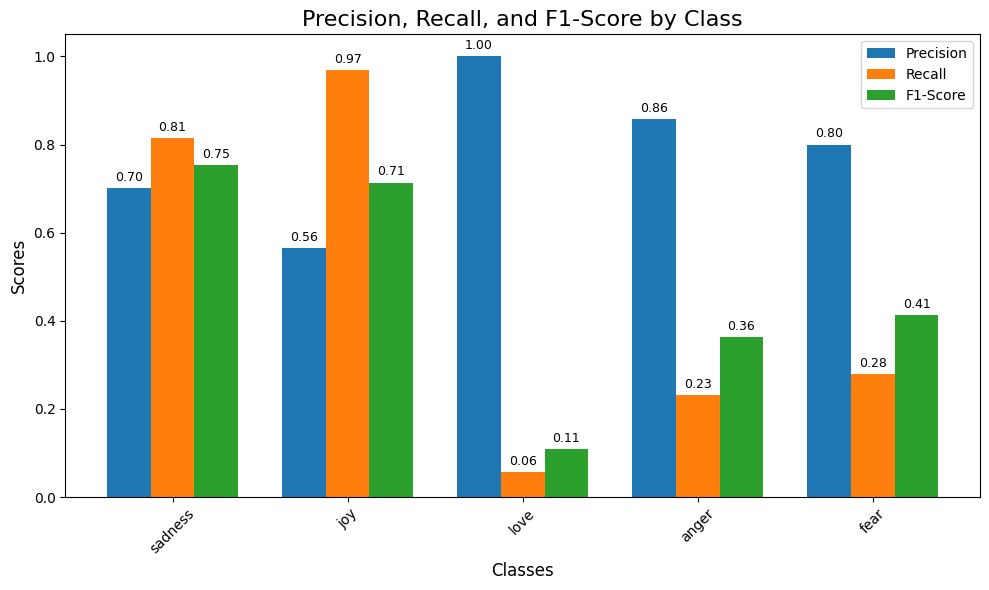

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
label_mapping = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear"}  # Define label mapping
report = classification_report(
    y_test,
    y_pred,
    labels=sorted(label_mapping.keys()),
    target_names=[label_mapping[label] for label in sorted(label_mapping.keys())],
    zero_division=1,
    output_dict=True,
)

# Extract precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]  # Ignore 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]["precision"] for cls in classes]
recall = [report[cls]["recall"] for cls in classes]
f1_score = [report[cls]["f1-score"] for cls in classes]

# Plot the metrics
x = np.arange(len(classes))  # Class indices
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
rects1 = ax.bar(x - width, precision, width, label="Precision")
rects2 = ax.bar(x, recall, width, label="Recall")
rects3 = ax.bar(x + width, f1_score, width, label="F1-Score")

# Add labels, title, and legend
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Precision, Recall, and F1-Score by Class", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, fontsize=10)
ax.legend()

# Add values on top of bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above bar
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)

add_values(rects1)
add_values(rects2)
add_values(rects3)

# Adjust layout and show the plot
fig.tight_layout()
plt.show()

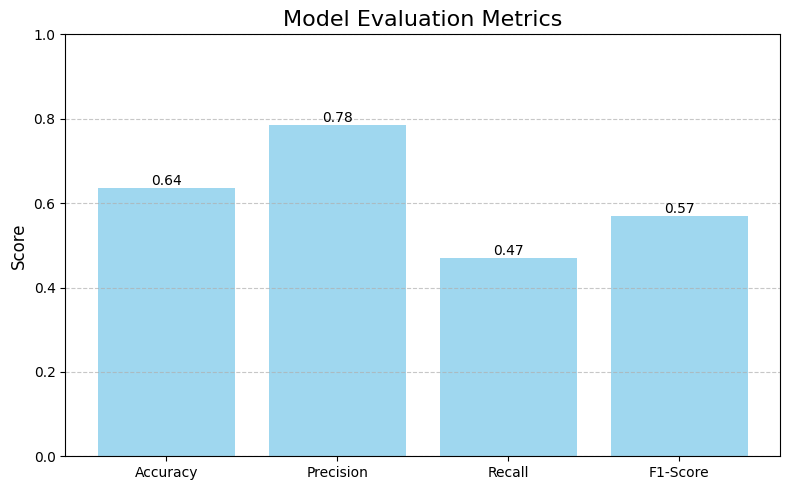

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
# Convert all score values to single numbers if they aren't already
# Use np.mean() to calculate the mean of precision and recall lists
scores = [accuracy, np.mean(precision), np.mean(recall), f1]

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color="skyblue", alpha=0.8)

# Annotate the bar heights
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )

# Add titles and labels
plt.title("Model Evaluation Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1.0)  # Ensure the y-axis is between 0 and 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**Description:**
I created a bar chart to visualize the Precision, Recall, and F1-Score for each class:

Data Extraction: I used classification_report to calculate the metrics for each class and stored them in a dictionary.
Plotting:
Plotted three sets of bars (Precision, Recall, F1-Score) for each class using Matplotlib.
Added labels, legends, and titles to make the chart informative.
Values on Bars: Displayed metric values directly above the bars for clarity.

**As an output:**

I got a grouped bar chart showing the Precision, Recall, and F1-Score for each class (e.g., sadness, joy, love, anger, fear).

## **8. Save the Model and Vectorizer**

In [11]:
import joblib

# Save the trained model
joblib.dump(model, "mood_classifier_model.joblib")

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

# Print confirmation messages
print("Model saved as 'mood_classifier_model.joblib'")
print("Vectorizer saved as 'tfidf_vectorizer.joblib'")

Model saved as 'mood_classifier_model.joblib'
Vectorizer saved as 'tfidf_vectorizer.joblib'


**Description:**

I saved the trained Logistic Regression model and the TF-IDF vectorizer using joblib. This step ensures that the model and vectorizer can be reused later without retraining or refitting.

Model Saving: The mood_classifier_model.joblib file stores the trained Logistic Regression model, including the learned weights and parameters.
Vectorizer Saving: The tfidf_vectorizer.joblib file saves the TF-IDF vectorizer, which contains the vocabulary and term weights used during feature extraction.

**As an output:**

I got two .joblib files: one for the model and another for the vectorizer. These files can be loaded back later to make predictions on new data without redoing the entire training process.